In [54]:
import os
from FTselection import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from scipy.fft import fft, ifft, fft2, ifft2
from scipy.stats import median_abs_deviation as mad
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")

In [12]:
def map_labels(pred, labels):
    mapping = {
        '0': -1, '1': -1, '2': -1, '3': -1, '4': -1,
        '5': -1, '6': -1, '7': -1, '8': -1, '9': -1,
        '10': -1, '11': -1, '12': -1, '13': -1
    }
    
    for i in range(len(y)):
        fill_done = True

        for val in mapping.values():
            if val == -1:
                fill_done = False
                break
            
        if fill_done:
            break

        if mapping[str(pred[i])] == -1:
            mapping[str(pred[i])] = labels[i]

    temp_labels = pred.copy()

    for i in range(len(labels)):
        temp_labels[i] = mapping[str(temp_labels[i])]
        
    return temp_labels

In [13]:
final_df = pd.read_csv("data3.csv")
final_df = final_df.drop(columns=['Unnamed: 0'])
final_df.head()

,labels,num_labels,FT0,FT1,FT2,FT3,FT4,FT5,FT6,FT7,...,FT38,FT39,FT40,FT41,FT42,FT43,FT44,FT45,FT46,FT47
0,Drink_glass,0,2.694958,3.790299,6.710054,2.383583,5.213972,1.841685,1.867810,3.035190,...,11.812205,11.086036,21.077241,183.620641,133.026637,465.492918,1449.887143,2039.181048,3610.008857,63.980880
1,Drink_glass,0,1.527453,0.974374,8.921903,2.015233,3.964369,1.127449,0.466952,0.933905,...,9.928688,8.127150,20.714786,109.324003,73.826886,432.605228,687.353905,928.076963,4014.856571,50.457775
2,Drink_glass,0,2.319197,6.658395,6.480261,2.785700,2.460621,1.060052,1.167381,0.933905,...,7.937667,13.900350,15.811646,68.065921,208.462817,253.144705,626.183143,1797.766667,1749.670571,44.578268
3,Drink_glass,0,2.471946,2.783247,9.031703,2.035693,2.022640,0.665546,0.933905,1.400857,...,11.293990,11.551437,18.619167,143.816928,163.188645,346.067768,875.068762,985.269524,3197.222952,43.722931
4,Drink_glass,0,1.283190,1.631856,8.931548,2.400873,3.597436,1.194292,0.466952,1.400857,...,11.768623,9.485888,26.825795,150.283564,95.972407,727.152448,1046.724374,1276.559294,6734.387238,61.130331


In [14]:
X = final_df.drop(columns=['labels', 'num_labels'])
y = final_df['labels']

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
scaler = PowerTransformer()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
from sklearn.preprocessing import LabelEncoder
LaEn = LabelEncoder()
LaEn.fit(y)
y_en = LaEn.transform(y)

In [17]:
from sklearn.decomposition import PCA

pca = PCA (n_components = 10, random_state=1089)
data_PCA = pca.fit (X_scaled).transform (X_scaled)
# data_PCA = pca.fit (X).transform (X)

In [18]:
print ('Explained variance ratio (first ten components): \n%s'
    % str (pca.explained_variance_ratio_))

sum(pca.explained_variance_ratio_)

Explained variance ratio (first ten components): 
[0.2428756  0.21223876 0.1783519  0.07952954 0.04494329 0.039571
 0.02617957 0.02445624 0.01786287 0.01686655]


0.8828753187554325

In [19]:
n = pca.n_components_
cols = ['PC'+str(i) for i in range(1,n+1)]
df_PCA = pd.DataFrame(data=data_PCA, columns=cols)
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.900776,3.413824,1.074531,0.731540,-2.843216,0.472149,1.314840,-2.594886,-0.671618,0.363083
1,-5.447159,2.404792,-1.139556,-2.440313,1.302580,-0.477933,-1.671628,-0.670473,-1.701619,0.120980
2,-5.517813,0.550271,-1.466039,2.594298,-2.928699,1.051387,-1.085567,-1.021418,-1.552004,0.320423
3,-5.145028,2.217152,-2.084208,-1.086351,0.019246,-0.027569,-1.307235,-0.243417,-0.669058,0.673836
4,-3.459956,4.129119,0.402800,-2.116078,1.222313,-0.125950,-0.505973,0.890509,-2.035717,0.287007


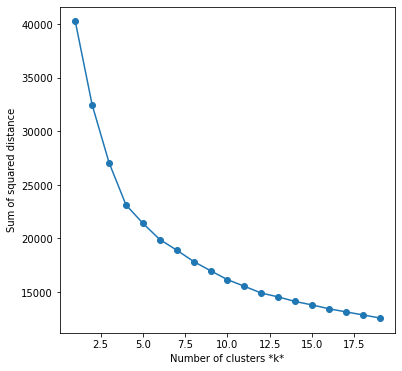

In [20]:
from sklearn.cluster import KMeans
# Run the Kmeans algorithm and get the index of data points clusters

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [21]:
kmean = KMeans(n_clusters=14)
df_PCA['Cluster'] = kmean.fit_predict(df_PCA)

df_PCA.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,-3.900776,3.413824,1.074531,0.731540,-2.843216,0.472149,1.314840,-2.594886,-0.671618,0.363083,0
1,-5.447159,2.404792,-1.139556,-2.440313,1.302580,-0.477933,-1.671628,-0.670473,-1.701619,0.120980,4
2,-5.517813,0.550271,-1.466039,2.594298,-2.928699,1.051387,-1.085567,-1.021418,-1.552004,0.320423,0
3,-5.145028,2.217152,-2.084208,-1.086351,0.019246,-0.027569,-1.307235,-0.243417,-0.669058,0.673836,0
4,-3.459956,4.129119,0.402800,-2.116078,1.222313,-0.125950,-0.505973,0.890509,-2.035717,0.287007,0
5,-6.034230,0.181407,-2.697628,-4.265914,0.458393,-0.267109,-0.972624,0.923924,-0.523742,0.366706,4
6,-5.655054,1.912264,0.932673,-0.927683,-1.318370,-0.068816,-0.267885,-0.221836,-0.105808,-0.589187,0
7,-5.862554,2.206742,-0.161136,-2.369760,-0.852519,-0.739211,0.327988,-0.829802,-0.289591,0.675120,0
8,-5.425043,2.562701,-0.564843,-0.004613,-1.750214,0.468554,0.489462,-0.817312,-1.027160,0.289725,0
9,-4.502974,1.237832,-0.059155,2.303030,-2.197991,1.332751,0.194365,-0.497203,-0.850331,1.038379,0


In [22]:
from sklearn.metrics import accuracy_score, completeness_score

mapped_pred = map_labels(df_PCA['Cluster'], y_en)
print(completeness_score(y_en, mapped_pred))

0.7558839155532475


# UMAP

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, PowerTransformer, SplineTransformer
# scaler = MinMaxScaler(feature_range=(0,1)) # comp: 72.56%, acc: 33.01%
# scaler = SplineTransformer() # comp: 73,29%, acc: 28,12%
# scaler = StandardScaler()   # comp: 67.24%, acc: 44.69%
scaler = PowerTransformer() # comp: 76.72%, acc: 38.02%
scaler.fit(X)
X_scaled = scaler.transform(X)

In [24]:
from sklearn.preprocessing import LabelEncoder
LaEn = LabelEncoder()
LaEn.fit(y)
y_en = LaEn.transform(y)

In [25]:
def plot_2d (component1, component2):
    fig = go.Figure (data = go.Scatter (
        x = component1,
        y = component2,
        mode = 'markers',
        marker = dict (
            size = 20,
            color = y, #set color equal to a variable
            colorscale = 'Rainbow', # one of plotly colorscales
            showscale = True,
            line_width = 1
        )
    ))
    fig.update_layout (margin = dict (l = 100, r = 100, b = 100, t = 100), width = 2000, height = 1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show ()

In [26]:
def plot_3d (component1, component2, component3):
    fig = go.Figure (data = [go.Scatter3d (
        x = component1,
        y = component2,
        z = component3,
        mode = 'markers',
        marker = dict (
            size = 10,
            color = y,                # set color to an array/list of desired values
            colorscale = 'Rainbow',   # choose a colorscale
            opacity = 1,
            line_width = 1
        )
    )])
# tight layout
    fig.update_layout (margin = dict (l = 50, r = 50, b = 50, t = 50), width = 1800, height = 1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show ()

In [27]:
import umap

reducer = umap.UMAP (n_neighbors=14, n_components = 3, random_state=10)
embedding = reducer.fit_transform (X_scaled)

In [ ]:
import plotly.io as plt_io
plt_io.renderers.default = "notebook"

plot_3d (reducer.embedding_ [:, 0], reducer.embedding_ [:, 1], reducer.embedding_ [:, 2])

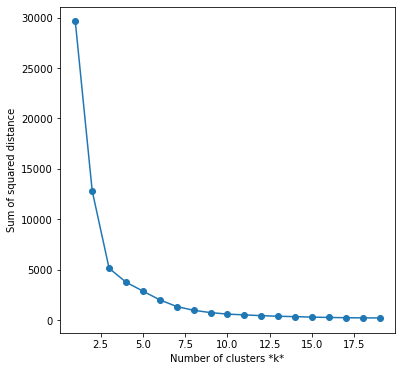

In [29]:
from sklearn.cluster import KMeans
# Run the Kmeans algorithm and get the index of data points clusters

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=20418)
    km.fit(embedding)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [30]:
df_UMAP = pd.DataFrame(data=embedding)
df_UMAP.head()

,0,1,2
0,13.643744,2.889538,9.604319
1,12.800976,2.175780,8.898661
2,13.986165,2.319755,10.014581
3,13.043922,1.913486,9.002362
4,12.615659,2.394105,8.930883


In [31]:
kmean = KMeans(n_clusters=14, random_state=89)
df_UMAP['Cluster'] = kmean.fit_predict(df_UMAP)
df_UMAP.head(5)

,0,1,2,Cluster
0,13.643744,2.889538,9.604319,12
1,12.800976,2.175780,8.898661,1
2,13.986165,2.319755,10.014581,12
3,13.043922,1.913486,9.002362,1
4,12.615659,2.394105,8.930883,1


In [32]:
from sklearn.metrics import classification_report , accuracy_score, completeness_score, precision_score

mapped_pred = map_labels(df_UMAP['Cluster'], y_en)
print(completeness_score(y_en, mapped_pred))

0.7792103598322366


In [33]:
best_acc_model = None
best_comp_model = None
best_acc_acc, best_acc_comp = 0, 0
best_comp_acc, best_comp_comp = 0, 0
n_iter = 1000

comps = []
accs = []


for i in range(n_iter):
    kmeans = KMeans(n_clusters=14)
    pred = kmeans.fit_predict(embedding)
    pred = map_labels(pred, y_en)

    acc = accuracy_score(pred, y_en)
    comp = completeness_score(y_en, pred)
    
    accs.append(acc)
    comps.append(comp)
    
    if acc > best_acc_acc:
        best_acc_acc = acc
        best_acc_comp = comp
        best_acc_model = kmeans
        
    if comp > best_comp_comp:
        best_comp_acc = acc
        best_comp_comp = comp
        best_comp_model = kmeans

<AxesSubplot:ylabel='Count'>

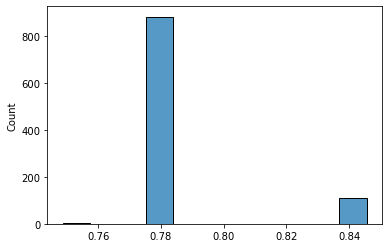

In [ ]:
sns.histplot(comps)

In [ ]:
best_acc_acc, best_acc_comp

(0.4231227651966627, 0.7486110894603896)

In [ ]:
best_comp_acc, best_comp_comp

(0.41477949940405245, 0.8456784665040781)

<AxesSubplot:>

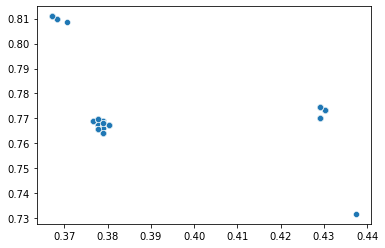

In [ ]:
sns.scatterplot(x=accs, y=comps)

In [47]:
best_comp_cen = pd.read_csv('Best_centroid2.csv')
best_comp_cen = best_comp_cen.drop(columns=['Unnamed: 0'])
best_comp_cen.head()

,0,1,2
0,8.404653,4.739290,5.885244
1,-0.675475,5.817407,8.523111
2,13.718981,2.332353,9.479940
3,6.887869,9.317850,8.476186
4,-0.256556,1.121217,6.361268


In [48]:
kmeans = KMeans(n_clusters=14, init=best_comp_cen.values)
pred = kmeans.fit_predict(embedding)
pred = map_labels(pred, y_en)

In [49]:
completeness_score(y_en, pred)

0.8456784665040781

In [50]:
accuracy_score(y_en, pred)

0.41477949940405245